<a href="https://colab.research.google.com/github/wahyualvyy/Mining-Google-Scrapper/blob/main/model_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Data_Clean.xlsx to Data_Clean.xlsx
Contoh data:
                                       Comment_Clean  label
0             moga gak akan bibitmaling gudung megah      2
1          jokowi sang maestro pimpin hebat pisioner      0
2  allah maha indahmaka indah ikn akan sangat suk...      0
3  hanya mbah amin selalu bilang mangkraksekali m...      1
4                              kota ndasmu sontoloyo      1

=== Model dengan Pembagian Data 90% Latih, 10% Uji ===

=== Akurasi ===
Akurasi: 0.8982

=== Model dengan Pembagian Data 80% Latih, 20% Uji ===

=== Akurasi ===
Akurasi: 0.8862

=== Model dengan Pembagian Data 70% Latih, 30% Uji ===

=== Akurasi ===
Akurasi: 0.8804

=== Laporan Klasifikasi (Tabel) ===
                                 precision    recall  f1-score      support
90% Latih, 10% Uji Positif        0.910256  0.887500  0.898734   240.000000
                   Negatif        0.886179  0.773050  0.825758   141.000000
                   Netral         0.895760  0.935424 

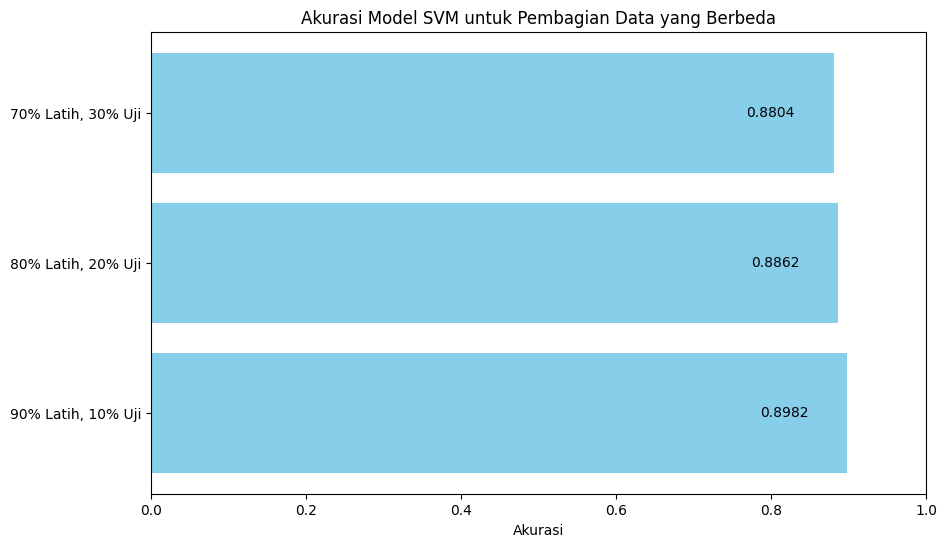

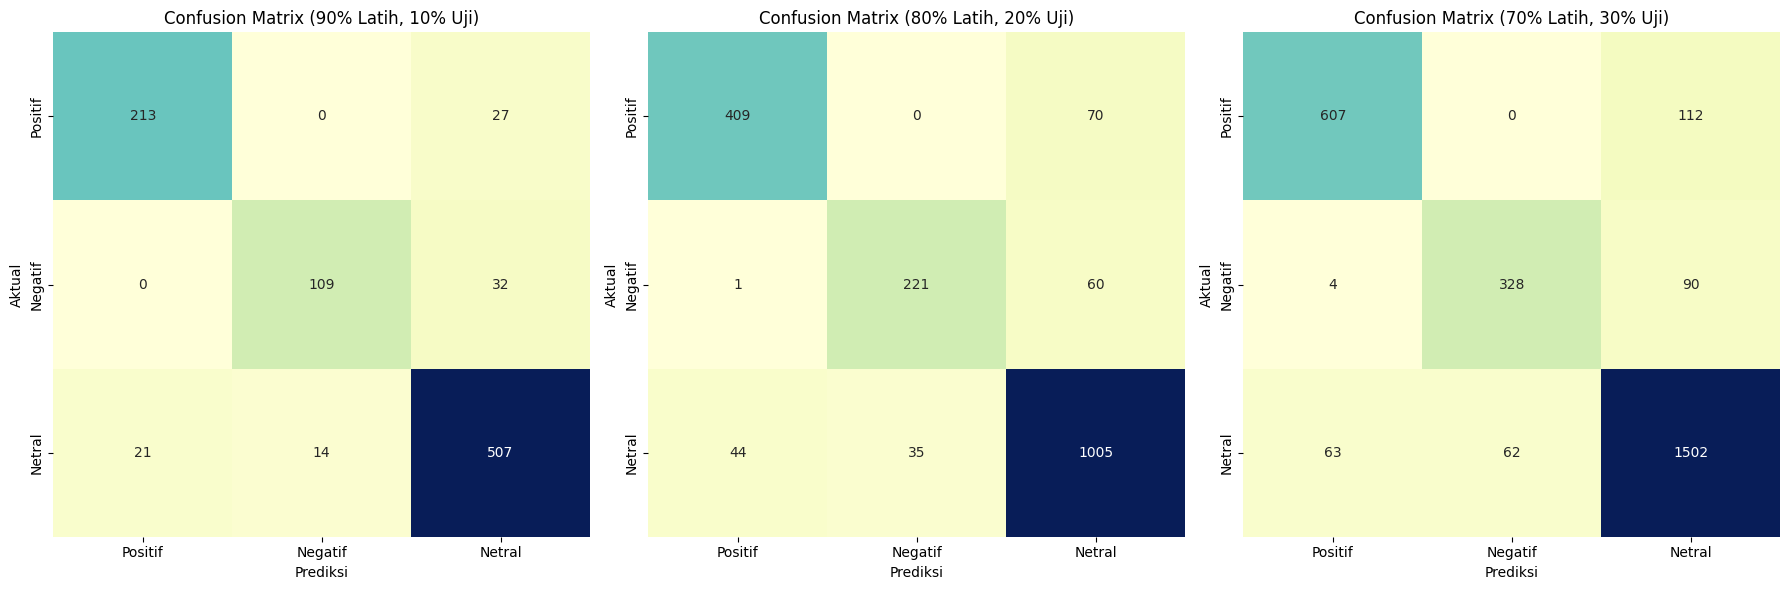

In [ ]:
# Install library yang dibutuhkan
!pip install pandas scikit-learn openpyxl matplotlib seaborn

# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

# Upload file Excel
uploaded = files.upload()

# Baca file dan cek isi
for filename in uploaded.keys():
    df = pd.read_excel(filename)

# Tampilkan beberapa data awal
print("Contoh data:")
print(df.head())

# Pastikan tidak ada nilai kosong
df = df.dropna(subset=['Comment_Clean', 'label'])

# Variasi pembagian data latih dan uji
splits = [(0.1, "90% Latih, 10% Uji"), (0.2, "80% Latih, 20% Uji"), (0.3, "70% Latih, 30% Uji")]

# List untuk menyimpan hasil akurasi, confusion matrix, dan laporan klasifikasi
accuracies = []
conf_matrices = []
classification_reports = []

# Loop untuk mencoba setiap pembagian data
for test_size, label in splits:
    print(f"\n=== Model dengan Pembagian Data {label} ===")

    # Split data sesuai dengan test_size
    X = df['Comment_Clean']
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y)

    # Bangun pipeline TF-IDF + SVM
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1,2), max_features=5000)),
        ('svm', LinearSVC())
    ])

    # Latih model
    pipeline.fit(X_train, y_train)

    # Prediksi
    y_pred = pipeline.predict(X_test)

    # Evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Matriks Kebingungannya
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices.append(conf_matrix)

    # Mendapatkan laporan klasifikasi dan mengonversinya ke DataFrame
    report = classification_report(y_test, y_pred, target_names=['Positif', 'Negatif', 'Netral'], output_dict=True)
    class_report_df = pd.DataFrame(report).transpose()
    classification_reports.append(class_report_df)

    print("\n=== Akurasi ===")
    print(f"Akurasi: {accuracy:.4f}")

# Menggabungkan semua laporan klasifikasi ke dalam satu DataFrame
final_classification_report = pd.concat(classification_reports, keys=[split[1] for split in splits])

# Menampilkan laporan klasifikasi sebagai tabel
print("\n=== Laporan Klasifikasi (Tabel) ===")
print(final_classification_report)

# Plot Akurasi dalam satu grafik (Horizontal Bar Chart)
plt.figure(figsize=(10, 6))
bars = plt.barh(['90% Latih, 10% Uji', '80% Latih, 20% Uji', '70% Latih, 30% Uji'], accuracies, color='skyblue')
plt.xlim(0, 1)
plt.title('Akurasi Model SVM untuk Pembagian Data yang Berbeda')
plt.xlabel('Akurasi')

# Menambahkan nilai akurasi di samping batang
for bar in bars:
    plt.text(bar.get_width() - 0.05, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.4f}', va='center', ha='right', color='black')

plt.show()

# Plot Confusion Matrix dalam satu grafik
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, conf_matrix in enumerate(conf_matrices):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Positif', 'Negatif', 'Netral'], yticklabels=['Positif', 'Negatif', 'Netral'], ax=axes[i], cbar=False)
    axes[i].set_title(f'Confusion Matrix ({splits[i][1]})')
    axes[i].set_xlabel('Prediksi')
    axes[i].set_ylabel('Aktual')

# Atur tata letak untuk menghindari tumpang tindih
plt.tight_layout()
plt.show()
